# 1st Subdivide

In [ ]:
import numpy as np

In [ ]:
class Pt:
  def __init__(self):
    self.x = 0.0
    self.y = 0.0
  
  def __init__(self,x,y):
    self.x = x *1.0
    self.y = y *1.0

  def add(o1,o2):
    # print(o1,o2)
    new = Pt(o1.x + o2.x,o1.y + o2.y)
    return new

  def __add__(self, new):
    print(new)
    return Pt(self.x+new.x,self.y+new.y)

  def __truediv__(self,value):
    self.x /= value
    self.y /= value
  
  def __str__(self):
    return "("+str(self.x)+","+str(self.y)+")"

  def __repr__(self):
    return "("+str(self.x)+","+str(self.y)+")"


In [ ]:
A = np.array([[Pt(-1,1),Pt(1,1)],[Pt(-1,-1),Pt(1,-1)]])
A

array([[(-1.0,1.0), (1.0,1.0)],
       [(-1.0,-1.0), (1.0,-1.0)]], dtype=object)

In [ ]:
def square(mesh,x,y,step):
  half = step//2
  avg = mesh[x][y]+mesh[x+step][y]+mesh[x][y+step]+mesh[x+step][y+step]
  avg /= 4.0
  mesh[x+half][y+half] = avg

In [ ]:
def diamond(mesh,x,y,step):
  half = step//2
  size = mesh.shape[0]-1
  avg = mesh[(x-half+size)%size][y]+ \
        mesh[(x+half)%size][y]+ \
        mesh[x][(y+half)%size]+ \
        mesh[x][(y-half+size)%size]
  avg /= 4.0
  mesh[x][y] = avg
  if x== 0:
    mesh[size][y]=avg
  if y== 0:
    mesh[x][size]=avg

In [ ]:
def subdivide(mesh):
  new_mesh = np.empty((mesh.shape[0]*2-1,mesh.shape[1]*2-1),dtype=Pt)
  new_mesh.fill(Pt(0.0,0.0))
  new_mesh[0][0] = mesh[0][0]
  new_mesh[0][new_mesh.shape[1]-1]= mesh[0][mesh.shape[1]-1] 
  new_mesh[new_mesh.shape[0]-1][0]= mesh[mesh.shape[0]-1][0]
  new_mesh[new_mesh.shape[0]-1][new_mesh.shape[1]-1]= mesh[mesh.shape[0]-1][mesh.shape[1]-1]
  # print(new_mesh) 
  step = new_mesh.shape[0]-1
  while step>1: 
    for i in range(new_mesh.shape[0]-1,step):
      for j in range(new_mesh.shape[1]-1,step):
        diamond(new_mesh,i,j,step)
    for i in range(new_mesh.shape[0]-1,step//2):
      for j in range((x+step//2)%step,new_mesh.shape[1]-1,step):
        square(new_mesh,i,j,step)
    step //= 2
  return new_mesh

In [ ]:
def subdivision(A,times):
  SA = A
  for i in range(times):
    SA = subdivide(SA)
  return SA


In [ ]:
SA = subdivision(A,3)
# print(A)
# print(SA)

# 2nd subdivide

In [ ]:
import random

In [ ]:
 def squareStep(A,x,z,reach):
   count = 0
   avg = 0.0
   sx = int(A.shape[0])
   sz = int(A.shape[1])

   if (x - reach) >= 0 and (z - reach) >= 0:
     avg += A[x - reach][z - reach]
     count+=1
   if (x - reach) >= 0 and (z + reach) < sz:
     avg += A[x - reach][z + reach]
     count+=1
   if (x + reach) < sx and (z - reach) >= 0:
     avg += A[x + reach][z - reach]
     count+=1
   if (x + reach) < sx and (z + reach) < sz:
     avg += A[x + reach][z + reach]
     count+=1
   avg += random.random()*reach
   avg /= count
   A[x][z] = avg

In [ ]:
def diamondStep(A,x,z,reach):
   count = 0
   avg = 0.0
   sx = int(A.shape[0])
   sz = int(A.shape[1])

   if (x - reach) >= 0 :
     avg += A[x - reach][z]
     count+=1
   if (x + reach) < sx:
     avg += A[x + reach][z]
     count+=1
   if (z - reach) >= 0:
     avg += A[x][z - reach]
     count+=1
   if (z + reach) < sz:
     avg += A[x][z + reach]
     count+=1
   avg += random.random()*reach
   avg /= count
   A[x][z] = avg

In [ ]:
def diamondSquare(A,size):
  half = int(size/2)
  print(half)
  if half < 1:
    return
  sx = int(A.shape[0])
  sz = int(A.shape[1])
  
  # Square
  for z in range(half,sz,size):
    for x in range(half,sx,size):
      squareStep(A,x % sx, z % sz,half)

  # Diamond
  col = 0 
  for x in range(0,sx,half):
    col+=1
    if col % 2 == 1:
      for z in range(half,sz,size):
        diamondStep(A,x % sx, z % sz,half)
    else:
      for z in range(0,sz,size):
        diamondStep(A,x % sx, z % sz,half)
  diamondSquare(A,int(size / 2))
  return A

In [ ]:
size = 50
A = np.array([[0.0 for i in range(size)] for j in range(size)])
SA = diamondSquare(A,size)
SA

25
12
6
3
1
0


array([[0.        , 0.28879047, 0.        , ..., 0.        , 0.        ,
        0.28160175],
       [0.22324803, 0.00074839, 0.        , ..., 0.        , 0.1361582 ,
        0.44961703],
       [0.        , 0.21238971, 0.        , ..., 0.        , 0.        ,
        0.24617282],
       ...,
       [0.16326936, 0.        , 0.        , ..., 0.        , 0.03014431,
        0.        ],
       [0.        , 0.11224885, 0.        , ..., 0.        , 0.        ,
        0.06846087],
       [0.39532248, 0.37143802, 0.        , ..., 0.        , 0.27668575,
        0.15889961]])

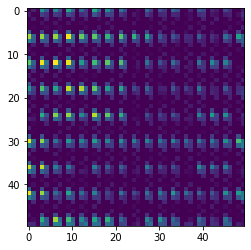

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(SA)
plt.show()
